# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss, roc_auc_score, auc
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from scipy import sparse

# Data Load - Binary bag of words data

In [2]:
#data loading

data_train = pd.read_csv(r"G:\Projects\Amazon fine food review\train_data.csv")

#data_test = pd.read_csv(r"G:\Projects\Amazon fine food review\test_data.csv")

In [3]:
#Loading binary_bag of words sparse features from loacl disk

binary_bag_of_words = sparse.load_npz(r"G:\Projects\Amazon fine food review\binary_bag_of_words_sparse.npz")

In [4]:
## Train Test split of Bag of Words -Binary data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(binary_bag_of_words, data_train['Score'], test_size = 0.2, random_state= 1, stratify =data_train['Score'] )

print("The shape of x_train is",x_train.shape)
print("The shape of x_train is",x_test.shape)
print("\nThe no of classes in x_train is\n",y_train.value_counts())
print("\nThe no of classes in x_test is\n",y_test.value_counts())

The shape of x_train is (80000, 4522963)
The shape of x_train is (20000, 4522963)

The no of classes in x_train is
 1    40000
0    40000
Name: Score, dtype: int64

The no of classes in x_test is
 1    10000
0    10000
Name: Score, dtype: int64


# Modelling using Binary BOW data

### 1. Lets try the baseline model first - Naive Bayes

The accuracy score for the train data is 0.998
The accuracy score for the test data is 0.896


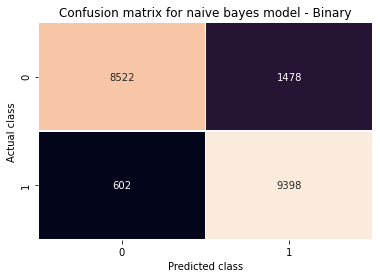

              precision    recall  f1-score   support

           0       0.93      0.85      0.89     10000
           1       0.86      0.94      0.90     10000

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000



In [5]:
#1. Naive_Bayes
from sklearn.naive_bayes import MultinomialNB 
n_bayes1 = MultinomialNB(alpha = 1.0, fit_prior=True, class_prior=None) 

n_bayes1.fit(x_train, y_train)


#Metrics for naive bayes model - binary
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss, roc_curve
import seaborn as sns
print("The accuracy score for the train data is",accuracy_score(y_train, n_bayes1.predict(x_train)))
print("The accuracy score for the test data is",accuracy_score(y_test, n_bayes1.predict(x_test)))
print("="*75)
sns.heatmap(confusion_matrix(y_test, n_bayes1.predict(x_test)), linewidths=0.5, annot=True, fmt='d', cbar=False )
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix for naive bayes model - Binary")
plt.show()
print("="*75)
print(classification_report(y_test, n_bayes1.predict(x_test)))

### 2nd Model - Logistic Regression with C = 1.0

The accuracy score for the train data is 1.0
The accuracy score for the test data is 0.9095


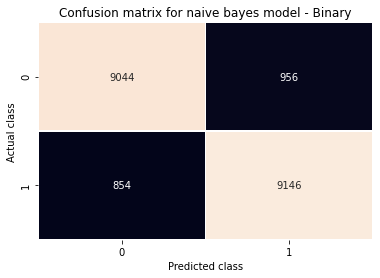

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     10000
           1       0.91      0.91      0.91     10000

    accuracy                           0.91     20000
   macro avg       0.91      0.91      0.91     20000
weighted avg       0.91      0.91      0.91     20000



In [6]:
#1. logistic Regression (C = 1)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_reg1 = LogisticRegression(n_jobs=-1) #C = 1

log_reg1.fit(x_train, y_train)


#Metrics for naive bayes model - binary
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss, roc_curve
import seaborn as sns
print("The accuracy score for the train data is",accuracy_score(y_train, log_reg1.predict(x_train)))
print("The accuracy score for the test data is",accuracy_score(y_test, log_reg1.predict(x_test)))
print("="*75)
sns.heatmap(confusion_matrix(y_test, log_reg1.predict(x_test)), linewidths=0.5, annot=True, fmt='d', cbar=False )
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix for naive bayes model - Binary")
plt.show()
print("="*75)
print(classification_report(y_test, log_reg1.predict(x_test)))

### 3. LogisticRegression (C = [0.01, 0.1, 1, 10] )- Grid Search CV

In [7]:
#3. LogisticRegression (C = [0.01, 0.1, 1, 10])

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_reg2 = LogisticRegression()
param = {"C":[0.01, 0.1, 1, 10]}
clf = GridSearchCV(estimator=log_reg2, param_grid=param, scoring="accuracy", n_jobs=-1, refit=True, cv= 3)

clf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10]}, scoring='accuracy')

The best param for the grid serach cv model is {'C': 10}
The best estimator is :-
 LogisticRegression(C=10)
The best score on the cv dataset is: 0.9065999927832222
The accuracy score on the CV dataset for 5 fold crossvalidation is :


,param_C,mean_test_score
0,0.01,0.889250
1,0.1,0.903425
2,1,0.906387
3,10,0.906600


The accuracy score for the train data is 1.0
The accuracy score for the test data is 0.90985


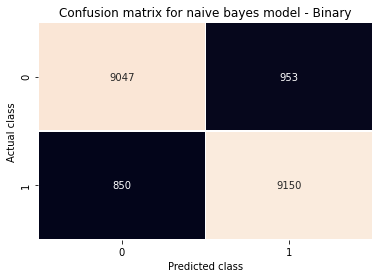

              precision    recall  f1-score   support

           0       0.91      0.90      0.91     10000
           1       0.91      0.92      0.91     10000

    accuracy                           0.91     20000
   macro avg       0.91      0.91      0.91     20000
weighted avg       0.91      0.91      0.91     20000



In [8]:
print("The best param for the grid serach cv model is",clf.best_params_)
print("The best estimator is :-\n",clf.best_estimator_)
print("The best score on the cv dataset is:",clf.best_score_)
print("="*75)
print("The accuracy score on the CV dataset for 5 fold crossvalidation is :")
display((pd.DataFrame(clf.cv_results_))[['param_C','mean_test_score']])
print("="*75)

#Metrics for Logistic Regression model - binary (using best found param)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss, roc_curve
import seaborn as sns
print("The accuracy score for the train data is",accuracy_score(y_train, clf.predict(x_train)))
print("The accuracy score for the test data is",accuracy_score(y_test, clf.predict(x_test)))
print("="*75)
sns.heatmap(confusion_matrix(y_test, clf.predict(x_test)), linewidths=0.5, annot=True, fmt='d', cbar=False )
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix for naive bayes model - Binary")
plt.show()
print("="*75)
print(classification_report(y_test, clf.predict(x_test)))

# Non Binary Bag Of Words data

In [9]:
#Loading non binary BOW from the local disk

non_binary_bag_of_words = sparse.load_npz(r"G:\Projects\Amazon fine food review\non_binary_bag_of_words_sparse.npz")

In [10]:
print("The shape of non binary BOW is",non_binary_bag_of_words.get_shape())

The shape of non binary BOW is (100000, 4522963)


In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(non_binary_bag_of_words, data_train['Score'], test_size = 0.2, random_state= 1, stratify =data_train['Score'] )

print("The shape of x_train is",x_train.shape)
print("The shape of x_train is",x_test.shape)
print("\nThe no of classes in x_train is\n",y_train.value_counts())
print("\nThe no of classes in x_test is\n",y_test.value_counts())

The shape of x_train is (80000, 4522963)
The shape of x_train is (20000, 4522963)

The no of classes in x_train is
 1    40000
0    40000
Name: Score, dtype: int64

The no of classes in x_test is
 1    10000
0    10000
Name: Score, dtype: int64


### 1. Naive Bayes Model for NON binary BOW

The accuracy score on train data is 0.9973875
The accuracy score on test data is 0.89445


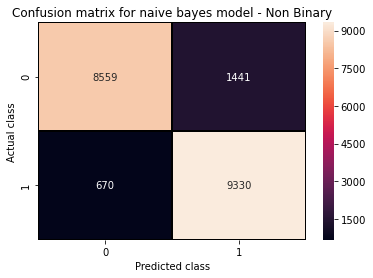

              precision    recall  f1-score   support

           0       0.93      0.86      0.89     10000
           1       0.87      0.93      0.90     10000

    accuracy                           0.89     20000
   macro avg       0.90      0.89      0.89     20000
weighted avg       0.90      0.89      0.89     20000



In [12]:
from sklearn.naive_bayes import MultinomialNB
n_bayes_nonBOW = MultinomialNB(alpha=1, fit_prior=True, class_prior=None)

n_bayes_nonBOW.fit(x_train, y_train)

y_pred = n_bayes_nonBOW.predict(x_test)

#Metrics for navie bayes model
from sklearn.metrics import log_loss, accuracy_score, auc, roc_auc_score, f1_score, confusion_matrix, classification_report
print("The accuracy score on train data is",accuracy_score(y_train, n_bayes_nonBOW.predict(x_train)))
print("The accuracy score on test data is",accuracy_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", linewidths=1, linecolor="black")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix for naive bayes model - Non Binary")
plt.show()
print("="*75)
print(classification_report(y_test, y_pred))

In [13]:
from sklearn.calibration import CalibratedClassifierCV
clf_isotonic = CalibratedClassifierCV(base_estimator=n_bayes_nonBOW, method='isotonic')
clf_isotonic.fit(x_train, y_train, )

print("The log loss for model is",log_loss(y_test, clf_isotonic.predict_proba(x_test)))

The log loss for model is 0.2674293335754321


### 2. Logistic Regression for Non Binary BOW - C = 10

The accuracy score on train data is 1.0
The accuracy score on test data is 0.9139


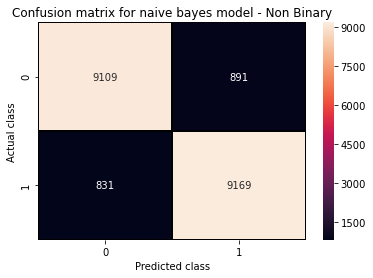

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     10000
           1       0.91      0.92      0.91     10000

    accuracy                           0.91     20000
   macro avg       0.91      0.91      0.91     20000
weighted avg       0.91      0.91      0.91     20000



In [14]:
from sklearn.linear_model import LogisticRegression

log_reg_nonBOW = LogisticRegression(C=10, n_jobs=-1)
log_reg_nonBOW.fit(x_train, y_train)

y_pred = log_reg_nonBOW.predict(x_test)

#Metrics for navie bayes model
from sklearn.metrics import log_loss, accuracy_score, auc, roc_auc_score, f1_score, confusion_matrix, classification_report
print("The accuracy score on train data is",accuracy_score(y_train, log_reg_nonBOW.predict(x_train)))
print("The accuracy score on test data is",accuracy_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", linewidths=1, linecolor="black")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix for naive bayes model - Non Binary")
plt.show()
print("="*75)
print(classification_report(y_test, y_pred))

In [15]:
from sklearn.calibration import CalibratedClassifierCV
clf_isotonic = CalibratedClassifierCV(base_estimator=log_reg_nonBOW, method='isotonic', )
clf_isotonic.fit(x_train, y_train, )

print("The log loss for model is",log_loss(y_test, clf_isotonic.predict_proba(x_test)))

The log loss for model is 0.22966471580782494


# TFIDF Data load

In [16]:
#Loading non binary BOW from the local disk
tfidf = sparse.load_npz(r"G:\Projects\Amazon fine food review\tfidf_sparse.npz")

print("The shape of Tfidf data is",tfidf.get_shape())

The shape of Tfidf data is (100000, 4522963)


In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(tfidf, data_train['Score'], test_size = 0.2, random_state= 1, stratify =data_train['Score'] )

print("The shape of x_train is",x_train.shape)
print("The shape of x_train is",x_test.shape)
print("\nThe no of classes in x_train is\n",y_train.value_counts())
print("\nThe no of classes in x_test is\n",y_test.value_counts())

The shape of x_train is (80000, 4522963)
The shape of x_train is (20000, 4522963)

The no of classes in x_train is
 1    40000
0    40000
Name: Score, dtype: int64

The no of classes in x_test is
 1    10000
0    10000
Name: Score, dtype: int64


### 1. Naive Bayes on TFIDF

The accuracy score on train data is 0.9884125
The accuracy score on test data is 0.89955


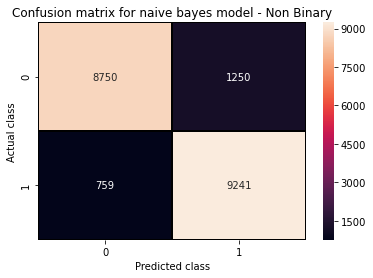

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     10000
           1       0.88      0.92      0.90     10000

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000



In [18]:
from sklearn.naive_bayes import MultinomialNB
n_bayes_tfidf = MultinomialNB(alpha=1, fit_prior=True, class_prior=None)

n_bayes_tfidf.fit(x_train, y_train)

y_pred = n_bayes_tfidf.predict(x_test)

#Metrics for navie bayes model
from sklearn.metrics import log_loss, accuracy_score, auc, roc_auc_score, f1_score, confusion_matrix, classification_report
print("The accuracy score on train data is",accuracy_score(y_train, n_bayes_tfidf.predict(x_train)))
print("The accuracy score on test data is",accuracy_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", linewidths=1, linecolor="black")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix for naive bayes model - Non Binary")
plt.show()
print("="*75)
print(classification_report(y_test, y_pred))

In [19]:
from sklearn.calibration import CalibratedClassifierCV
clf_isotonic = CalibratedClassifierCV(base_estimator=n_bayes_tfidf, method='isotonic')
clf_isotonic.fit(x_train, y_train)

print("The log loss for model is",log_loss(y_test, clf_isotonic.predict_proba(x_test)))

The log loss for model is 0.25122065721600945


### 2. Logistic Regression on TFIDF

The accuracy score on train data is 0.9991875
The accuracy score on test data is 0.9112


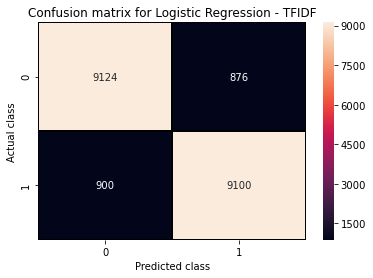

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     10000
           1       0.91      0.91      0.91     10000

    accuracy                           0.91     20000
   macro avg       0.91      0.91      0.91     20000
weighted avg       0.91      0.91      0.91     20000



In [20]:
from sklearn.linear_model import LogisticRegression

log_reg_tfidf = LogisticRegression(C=10, n_jobs=-1)
log_reg_tfidf.fit(x_train, y_train)

y_pred = log_reg_tfidf.predict(x_test)

#Metrics for navie bayes model
from sklearn.metrics import log_loss, accuracy_score, auc, roc_auc_score, f1_score, confusion_matrix, classification_report
print("The accuracy score on train data is",accuracy_score(y_train, log_reg_tfidf.predict(x_train)))
print("The accuracy score on test data is",accuracy_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", linewidths=1, linecolor="black")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix for Logistic Regression - TFIDF")
plt.show()
print("="*75)
print(classification_report(y_test, y_pred))

In [21]:
from sklearn.calibration import CalibratedClassifierCV
clf_isotonic = CalibratedClassifierCV(base_estimator=log_reg_tfidf, method='isotonic', )
clf_isotonic.fit(x_train, y_train, )

print("The log loss for model is",log_loss(y_test, clf_isotonic.predict_proba(x_test)))

The log loss for model is 0.22624678239967871


# Word To Vec (Gensim) Embeddings

In [22]:
#Featurizing text with avgW2V and tfidfW2V

import gensim
from gensim.models import Word2Vec, KeyedVectors

In [23]:
data_train[0:2]

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Summary_count,Text_count,Summary_length,Text_length,Comment,Comment_count,Comment_length,processed_text
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,4,48,21,263,Good Quality Dog Food I have bought several of...,52,285,good qualiti dog food bought sever vital can d...
1,1,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,4,94,21,509,"""Delight"" says it all This is a confection tha...",98,531,delight say confect around centuri light pillo...


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_train, data_train["Score"].values, test_size = 0.2, random_state = 1 , stratify=data_train['Score'] )

In [25]:
print("The shape of x_train is",x_train.shape)
print("The shape of y_train is",y_train.shape)
print("The shape of x_test is",x_test.shape)
print("The shape of y_test is",y_test.shape)

The shape of x_train is (80000, 19)
The shape of y_train is (80000,)
The shape of x_test is (20000, 19)
The shape of y_test is (20000,)


In [26]:
#Here we are creating our own a list of lists. It will go as an input to the Word2Vec model.
from tqdm import tqdm
text_list = []
for sen in tqdm(x_train['processed_text']):
    text_list.append(sen.split())

100%|█████████████████████████████████| 80000/80000 [00:00<00:00, 82662.12it/s]


In [27]:
#Creating Word to Vec Embeddings

w2v = Word2Vec(text_list, size= 300, min_count=3, workers=4)

In [28]:
print("The length of the W2V vocabulary is",len(w2v.wv.vocab))
print(w2v.wv.most_similar(positive="impress"))
print(w2v.wv.most_similar(positive="best"))

The length of the W2V vocabulary is 19265
[('disappoint', 0.5687646269798279), ('intrigu', 0.5580053925514221), ('skeptic', 0.534982442855835), ('underwhelm', 0.5247279405593872), ('dissapoint', 0.5189185738563538), ('dissappoint', 0.5008965730667114), ('dislik', 0.488815039396286), ('surpris', 0.4873434901237488), ('appreci', 0.45032939314842224), ('displeas', 0.446303129196167)]
[('worst', 0.6288071870803833), ('greatest', 0.6216166615486145), ('tastiest', 0.6150312423706055), ('healthiest', 0.5784456729888916), ('closest', 0.5728050470352173), ('superior', 0.5370957255363464), ('nastiest', 0.5341164469718933), ('favorit', 0.5141947269439697), ('had', 0.5107884407043457), ('fantast', 0.4707719087600708)]


# Avg W2V for Training data 

In [29]:
vocab = list(w2v.wv.vocab.keys()) #list of all the words in the vocabulary

#creating sentence vector for the comments in Train data

sen_list_train = []
for sent in tqdm(x_train['processed_text'].values):
    count = 0
    sent_vect = np.zeros(shape=300)
    for word in sent.split():
        if word in vocab:
            word_vec = w2v.wv.get_vector(word)
            sent_vect += word_vec
            count = count + 1
    if count != 0:
        avg_sent_vec = (sent_vect/count)
    
    sen_list_train.append(avg_sent_vec)

100%|███████████████████████████████████| 80000/80000 [05:27<00:00, 244.30it/s]


## Avg W2V for the Test data


In [30]:
# As the text data is unseen data we are using the same w2v model that we have trained for Training data

vocab = list(w2v.wv.vocab.keys())

sen_list_test = []
for sent in tqdm(x_test['processed_text'].values):
    count = 0
    sent_vect = np.zeros(shape=300)
    for word in sent.split():
        if word in vocab:
            word_vec = w2v.wv.get_vector(word)
            sent_vect += word_vec
            count = count + 1
    if count != 0:
        avg_sent_vec = sent_vect/count
    
    sen_list_test.append(avg_sent_vec)

100%|███████████████████████████████████| 20000/20000 [01:26<00:00, 230.91it/s]


In [31]:
training_data = pd.concat([x_train.reset_index(drop=True), pd.DataFrame(sen_list_train)] , axis=1)

In [32]:
print("The shape of Training data is",training_data.shape)
training_data.head()

The shape of Training data is (80000, 319)


,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,...,290,291,292,293,294,295,296,297,298,299
0,68961,150223,B000HQO2E2,ARRLR2TGELGLO,kendee,0,0,0,1256601600,Not impressed,...,0.070027,-0.018702,0.366816,-0.069523,-0.370466,0.328197,0.217862,-0.131426,-0.174153,-0.227579
1,60938,81336,B002LBTIJA,A183QRP0E58O93,Stephen D. Conley,0,3,0,1329264000,Too expensive,...,-0.588857,0.179788,0.480371,0.126405,-0.040305,0.542755,0.032614,-0.252434,0.254945,0.329228
2,78948,248360,B001SAY7PU,A3D6OI36USYOU1,Ghenghis,0,0,0,1305763200,"Sylvia, I love ya babe, BUT.......",...,-0.044567,0.125375,0.146129,-0.266848,-0.101631,0.333738,0.057897,0.068607,0.239540,0.143338
3,74558,206561,B000OS8RKS,A27048ATP16PYN,Unhappy in LA,2,2,0,1340582400,Not product ordered and scam,...,-0.154266,0.247175,0.361915,0.057489,-0.378733,0.218306,0.041255,0.051122,-0.009440,-0.019562
4,39402,55624,B004CYLW7A,AFHYEO3Y1IIDD,maximum verbosity,2,3,1,1296432000,Just as described - delicious,...,-0.017637,-0.078636,0.269956,-0.307135,-0.007103,0.088204,0.368698,-0.107696,-0.036439,-0.161973


In [33]:
testing_data = pd.concat([x_test.reset_index(drop=True), pd.DataFrame(sen_list_test)] , axis=1)

print("The shape of Testing data is",testing_data.shape)
testing_data.head()

The shape of Testing data is (20000, 319)


,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,...,290,291,292,293,294,295,296,297,298,299
0,10567,14329,B001CWV4PA,A2U9ZFAF33I7IT,"yellow m&m ""yellow m&m""",0,0,1,1342310400,Glutino Crackers,...,0.367218,-0.363285,-0.016205,0.045589,-0.056540,0.095908,-0.034503,0.543253,0.097172,0.149714
1,59623,70703,B001LQNUPO,A1D1D35O0MDM1T,Retired2AZ,0,1,0,1312416000,Not for all espresso machines,...,-0.407701,0.074162,0.116994,0.198357,-0.122010,0.821065,-0.454192,0.305813,-0.225439,-0.318302
2,9364,12780,B0030MNHEG,AKBGBE9H1C0L6,Tanooki-san,0,0,1,1344211200,Good Stuff,...,-0.062280,0.157440,0.127656,0.092755,-0.243243,0.221182,0.224094,0.020539,0.003981,0.176744
3,54724,34336,B001P3NU30,A3B2HH9SQEQPT7,Graymare,1,1,0,1296950400,Inconsistent Thickness a BIG Problem,...,0.007337,0.043260,0.039784,-0.508197,-0.276086,0.417634,0.178045,-0.328886,0.117633,-0.068083
4,2976,3882,B003159ETE,A1Y693GFN95CTS,virginiab,1,1,1,1318982400,Nice polyvalent spice,...,-0.229120,-0.010432,0.148757,-0.055052,-0.019289,0.178807,0.185584,0.031787,-0.084846,0.262250


In [34]:
#Droping unused columns from the training and Testing data:

training_data = training_data.drop(labels=['Unnamed: 0','Id','ProductId','UserId','ProfileName','HelpfulnessNumerator',\
    'HelpfulnessDenominator','Score','Time','Summary','Text', 'Comment','processed_text'], axis=1)

testing_data = testing_data.drop(labels=['Unnamed: 0','Id','ProductId','UserId','ProfileName','HelpfulnessNumerator',\
    'HelpfulnessDenominator','Score','Time','Summary','Text', 'Comment','processed_text'], axis=1)

print("The shape of Testing data is",testing_data.shape)
print("The shape of Training data is",training_data.shape)

The shape of Testing data is (20000, 306)
The shape of Training data is (80000, 306)


In [35]:
training_data.head()

,Summary_count,Text_count,Summary_length,Text_length,Comment_count,Comment_length,0,1,2,3,...,290,291,292,293,294,295,296,297,298,299
0,2,41,13,220,43,234,0.061212,0.042148,0.270605,-0.012365,...,0.070027,-0.018702,0.366816,-0.069523,-0.370466,0.328197,0.217862,-0.131426,-0.174153,-0.227579
1,2,24,13,143,26,157,-0.505223,0.674694,0.817039,-0.620096,...,-0.588857,0.179788,0.480371,0.126405,-0.040305,0.542755,0.032614,-0.252434,0.254945,0.329228
2,6,91,34,518,97,553,0.049025,0.082701,-0.010751,-0.143729,...,-0.044567,0.125375,0.146129,-0.266848,-0.101631,0.333738,0.057897,0.068607,0.239540,0.143338
3,5,135,28,805,140,834,-0.212540,0.157405,0.256945,-0.255017,...,-0.154266,0.247175,0.361915,0.057489,-0.378733,0.218306,0.041255,0.051122,-0.009440,-0.019562
4,5,109,29,569,114,599,-0.040934,0.437921,0.422594,-0.194429,...,-0.017637,-0.078636,0.269956,-0.307135,-0.007103,0.088204,0.368698,-0.107696,-0.036439,-0.161973


## Data Preprocessing of W2V data

In [36]:
# Standardization of data

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
training_data_scaled= pd.DataFrame(scale.fit_transform(training_data), columns=training_data.columns)

In [37]:
training_data_scaled.head()

,Summary_count,Text_count,Summary_length,Text_length,Comment_count,Comment_length,0,1,2,3,...,290,291,292,293,294,295,296,297,298,299
0,-0.810523,-0.523236,-0.745542,-0.512896,-0.545531,-0.531854,0.168426,-0.644223,0.136040,1.132880,...,0.275145,-0.525459,0.853463,0.576922,-1.095644,0.563291,-0.046588,-0.703179,-0.896215,-0.754146
1,-0.810523,-0.740190,-0.745542,-0.686697,-0.760420,-0.703969,-2.459741,2.790018,2.300601,-2.397385,...,-2.738051,0.439554,1.349233,1.315070,0.749578,1.605985,-0.999523,-1.311287,1.048880,2.242253
2,0.691976,0.114864,0.716979,0.159734,0.137057,0.181197,0.111883,-0.424047,-0.978481,0.369797,...,-0.248913,0.175013,-0.110028,-0.166493,0.406835,0.590219,-0.869466,0.302061,0.979048,1.241907
3,0.316351,0.676393,0.299116,0.807535,0.680600,0.809308,-1.101737,-0.018466,0.081932,-0.276668,...,-0.750591,0.767179,0.832068,1.055432,-1.141845,0.029247,-0.955069,0.214191,-0.149573,0.365277
4,0.316351,0.344581,0.368760,0.274848,0.351946,0.284020,-0.305516,1.504522,0.738106,0.075282,...,-0.125760,-0.816841,0.430587,-0.318275,0.935135,-0.603017,0.729323,-0.583930,-0.271957,-0.401091


In [38]:
testing_data_scaled= pd.DataFrame(scale.transform(testing_data), columns=training_data.columns)
testing_data_scaled.head()

,Summary_count,Text_count,Summary_length,Text_length,Comment_count,Comment_length,0,1,2,3,...,290,291,292,293,294,295,296,297,298,299
0,-0.810523,-0.650856,-0.536610,-0.609954,-0.671936,-0.621264,0.212352,0.381748,-0.865732,0.301837,...,1.634252,-2.200743,-0.818759,1.010602,0.658840,-0.565578,-1.344779,2.687329,0.333697,1.276218
1,0.316351,-0.625332,0.368760,-0.591897,-0.608734,-0.574324,0.787515,-0.481999,2.976413,1.052228,...,-1.909594,-0.073973,-0.237227,1.586147,0.292941,2.958504,-3.503697,1.494108,-1.128693,-1.242362
2,-0.810523,3.381938,-0.954473,3.123369,3.322471,3.062460,0.923186,-0.053232,-0.365300,0.254443,...,-0.329921,0.330906,-0.190678,1.188297,-0.384616,0.043225,-0.014533,0.060499,-0.088735,1.421678
3,0.316351,0.714679,0.856267,0.638249,0.718522,0.659545,-0.884877,-0.124482,0.682158,0.079783,...,-0.011549,-0.224211,-0.574320,-1.075766,-0.568169,0.997930,-0.251413,-1.695489,0.426447,0.104167
4,-0.434898,-0.459426,-0.188391,-0.497096,-0.469688,-0.498325,0.153222,-0.810441,-0.665646,-0.397481,...,-1.092911,-0.485250,-0.098556,0.631441,0.867031,-0.162710,-0.212632,0.117023,-0.491386,1.881817


# Modelling
### 1. Naive Bayes on W2V data

In [39]:
from sklearn.naive_bayes import GaussianNB
n_bayes_w2v = GaussianNB()
n_bayes_w2v.fit(training_data_scaled.values, y_train)

GaussianNB()

The accuracy score on train data is 0.8237875
The accuracy score on test data is 0.8207


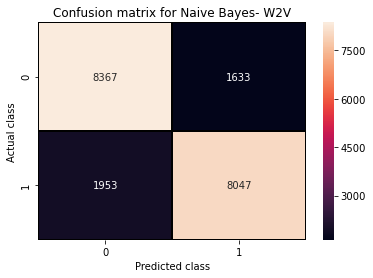

              precision    recall  f1-score   support

           0       0.81      0.84      0.82     10000
           1       0.83      0.80      0.82     10000

    accuracy                           0.82     20000
   macro avg       0.82      0.82      0.82     20000
weighted avg       0.82      0.82      0.82     20000



In [40]:
#Metrics for navie bayes model
from sklearn.metrics import log_loss, accuracy_score, auc, roc_auc_score, f1_score, confusion_matrix, classification_report
print("The accuracy score on train data is",accuracy_score(y_train, n_bayes_w2v.predict(training_data_scaled)))
print("The accuracy score on test data is",accuracy_score(y_test, n_bayes_w2v.predict(testing_data_scaled)))

sns.heatmap(confusion_matrix(y_test, n_bayes_w2v.predict(testing_data_scaled)), annot=True, fmt="d", linewidths=1, linecolor="black")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix for Naive Bayes- W2V")
plt.show()
print("="*75)
print(classification_report(y_test, n_bayes_w2v.predict(testing_data_scaled)))

### 2. Logistic Regression on W2V data

In [41]:
from sklearn.linear_model import LogisticRegression
log_reg_w2v = LogisticRegression(n_jobs=-1)
log_reg_w2v.fit(training_data_scaled.values, y_train)

LogisticRegression(n_jobs=-1)

The accuracy score on train data is 0.887075
The accuracy score on test data is 0.8841


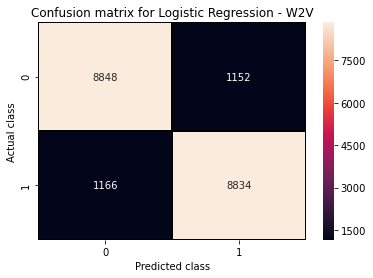

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     10000
           1       0.88      0.88      0.88     10000

    accuracy                           0.88     20000
   macro avg       0.88      0.88      0.88     20000
weighted avg       0.88      0.88      0.88     20000



In [42]:
# Metrics for Log Reg model
from sklearn.metrics import log_loss, accuracy_score, auc, roc_auc_score, f1_score, confusion_matrix, classification_report
print("The accuracy score on train data is",accuracy_score(y_train, log_reg_w2v.predict(training_data_scaled)))
print("The accuracy score on test data is",accuracy_score(y_test, log_reg_w2v.predict(testing_data_scaled)))

sns.heatmap(confusion_matrix(y_test, log_reg_w2v.predict(testing_data_scaled)), annot=True, fmt="d", linewidths=1, linecolor="black")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix for Logistic Regression - W2V")
plt.show()
print("="*75)
print(classification_report(y_test, log_reg_w2v.predict(testing_data_scaled)))

### 3. Decision Tree on W2V data

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtree_w2v = DecisionTreeClassifier(max_depth=10, random_state=1)
dtree_w2v.fit(training_data_scaled,y_train)

DecisionTreeClassifier(max_depth=10, random_state=1)

The accuracy score on train data is 0.8773875
The accuracy score on test data is 0.80375


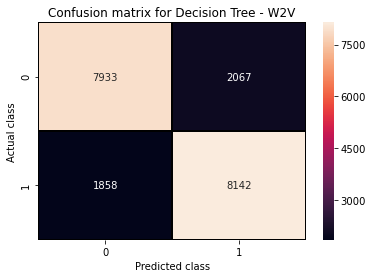

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     10000
           1       0.80      0.81      0.81     10000

    accuracy                           0.80     20000
   macro avg       0.80      0.80      0.80     20000
weighted avg       0.80      0.80      0.80     20000



In [44]:
y_predict = dtree_w2v.predict(testing_data_scaled)

from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix, roc_auc_score, auc
print("The accuracy score on train data is",accuracy_score(y_train, dtree_w2v.predict(training_data_scaled)))
print("The accuracy score on test data is",accuracy_score(y_test, dtree_w2v.predict(testing_data_scaled)))

sns.heatmap(confusion_matrix(y_test, dtree_w2v.predict(testing_data_scaled)), annot=True, fmt="d", linewidths=1, linecolor="black")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix for Decision Tree - W2V")
plt.show()
print("="*75)
print(classification_report(y_test, dtree_w2v.predict(testing_data_scaled)))

In [45]:
#Grid Search CV on the finding the best bepth of tree

from sklearn.model_selection import GridSearchCV

decision_tree = DecisionTreeClassifier()
param_grid = {'max_depth':[5,10,15,20,25,30]}
dtree_grid = GridSearchCV(decision_tree, param_grid=param_grid, scoring = 'accuracy', n_jobs=-1, refit=True, cv = 3)

dtree_grid.fit(training_data_scaled, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30]},
             scoring='accuracy')

In [46]:
print("The best param for the grid serach cv model is",dtree_grid.best_params_)
print("The best estimator is :-\n",dtree_grid.best_estimator_)
print("The best score on the cv dataset is:",dtree_grid.best_score_)
print("="*75)
print("The accuracy score on the CV dataset for 3 fold crossvalidation is :")
display((pd.DataFrame(dtree_grid.cv_results_))[['params','mean_test_score']])

The best param for the grid serach cv model is {'max_depth': 10}
The best estimator is :-
 DecisionTreeClassifier(max_depth=10)
The best score on the cv dataset is: 0.7931125154042902
The accuracy score on the CV dataset for 3 fold crossvalidation is :


,params,mean_test_score
0,{'max_depth': 5},0.776500
1,{'max_depth': 10},0.793113
2,{'max_depth': 15},0.778675
3,{'max_depth': 20},0.769750
4,{'max_depth': 25},0.766725
5,{'max_depth': 30},0.763450


### 4. Random Forest on W2V data

In [47]:
from sklearn.ensemble import RandomForestClassifier
r_forest_w2v = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1, )
r_forest_w2v.fit(training_data_scaled, y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True)

In [48]:
print("The oob score is",r_forest_w2v.oob_score_)

The oob score is 0.86485


The accuracy score on train data is 100.0
The accuracy score on test data is 86.875


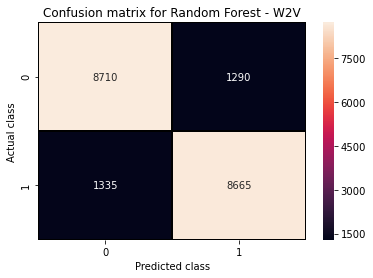

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     10000
           1       0.87      0.87      0.87     10000

    accuracy                           0.87     20000
   macro avg       0.87      0.87      0.87     20000
weighted avg       0.87      0.87      0.87     20000



In [49]:
y_pred = r_forest_w2v.predict(testing_data_scaled)

from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix, roc_auc_score, auc
print("The accuracy score on train data is",accuracy_score(y_train, r_forest_w2v.predict(training_data_scaled))*100)
print("The accuracy score on test data is",accuracy_score(y_test, r_forest_w2v.predict(testing_data_scaled))*100)

sns.heatmap(confusion_matrix(y_test, r_forest_w2v.predict(testing_data_scaled)), annot=True, fmt="d", linewidths=1, linecolor="black")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix for Random Forest - W2V")
plt.show()
print("="*75)
print(classification_report(y_test, r_forest_w2v.predict(testing_data_scaled)))

### 5. Decision Tree on Binary BOW data

The shape of x_train is (80000, 4522963)
The shape of x_train is (20000, 4522963)

The no of classes in x_train is
 1    40000
0    40000
Name: Score, dtype: int64

The no of classes in x_test is
 1    10000
0    10000
Name: Score, dtype: int64
The accuracy score for the train data is 0.785025
The accuracy score for the test data is 0.77275


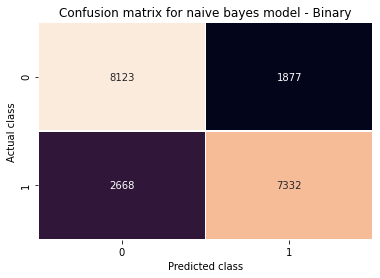

              precision    recall  f1-score   support

           0       0.75      0.81      0.78     10000
           1       0.80      0.73      0.76     10000

    accuracy                           0.77     20000
   macro avg       0.77      0.77      0.77     20000
weighted avg       0.77      0.77      0.77     20000



In [50]:
#1. Decision tree

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(binary_bag_of_words, data_train['Score'], test_size = 0.2, random_state= 1, stratify =data_train['Score'] )

print("The shape of x_train is",x_train.shape)
print("The shape of x_train is",x_test.shape)
print("\nThe no of classes in x_train is\n",y_train.value_counts())
print("\nThe no of classes in x_test is\n",y_test.value_counts())


from sklearn.tree import DecisionTreeClassifier 
d_tree_bow = DecisionTreeClassifier(max_depth=10) 

d_tree_bow.fit(x_train, y_train)


#Metrics for naive bayes model - binary
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss, roc_curve
import seaborn as sns
print("The accuracy score for the train data is",accuracy_score(y_train, d_tree_bow.predict(x_train)))
print("The accuracy score for the test data is",accuracy_score(y_test, d_tree_bow.predict(x_test)))
print("="*75)
sns.heatmap(confusion_matrix(y_test, d_tree_bow.predict(x_test)), linewidths=0.5, annot=True, fmt='d', cbar=False )
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix for naive bayes model - Binary")
plt.show()
print("="*75)
print(classification_report(y_test, d_tree_bow.predict(x_test)))

## Word2Vec using Glove - Glove Embeddings

In [51]:
#https://spacy.io/models/en, #https://spacy.io/usage/vectors-similarity
import en_core_web_sm
nlp1 = en_core_web_sm.load()

In [52]:
data_glove = pd.read_csv(r"G:\Projects\Amazon fine food review\data_glove.csv", index_col=[0])

print("The shape of data is",data_glove.shape)
data_glove.head()

The shape of data is (100000, 391)


,Score,Summary_count,Text_count,Summary_length,Text_length,Comment_count,Comment_length,0,1,2,...,374,375,376,377,378,379,380,381,382,383
0,1,4,48,21,263,52,285,0.223920,0.256956,-0.144550,...,0.013149,0.457953,0.131216,-0.114049,0.213200,0.028965,-0.179116,0.148462,0.362201,-0.053228
1,1,4,94,21,509,98,531,0.590477,0.357555,-0.161876,...,0.109922,0.463689,0.214407,-0.118931,0.210837,-0.008449,-0.118547,-0.063913,0.093863,0.147607
2,1,2,27,11,140,29,152,0.568659,1.004814,0.686201,...,0.295575,0.737231,0.037618,0.006109,0.130877,-0.109275,-0.351270,0.216919,-0.234948,0.101312
3,1,2,72,10,416,74,427,0.454110,0.618403,-0.147291,...,0.117951,0.430025,0.063170,-0.068731,0.289102,-0.049408,-0.188171,0.087250,-0.022930,0.077204
4,1,8,49,45,304,57,350,0.327439,0.239264,0.108918,...,0.111299,0.476485,-0.056751,0.000359,0.355433,-0.050075,-0.206280,0.075638,-0.124964,0.079414


In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_glove.iloc[:,1:].values, data_glove["Score"].values, test_size = 0.2, random_state = 1 \
                        , stratify=data_train['Score'])

print("The shape of x_train is",x_train.shape)
print("The shape of y_train is",y_train.shape)
print("The shape of x_test is",x_test.shape)
print("The shape of y_test is",y_test.shape)

The shape of x_train is (80000, 390)
The shape of y_train is (80000,)
The shape of x_test is (20000, 390)
The shape of y_test is (20000,)


### Random model and its log Loss - computing log loss on testing data

In [54]:
#log loss for the testing data for a random model
log_loss_array = []
for i in range(len(x_test)):
    rand_num = np.random.random(2)
    prob_0 = rand_num[0]/(rand_num[0]+rand_num[1])
    prob_1 = rand_num[1]/(rand_num[0]+rand_num[1])
    log_loss_array.append(np.array([prob_0, prob_1]))

Log Loss on test data on Random Model  0.8783033382588117
The accuracy score on test data for random model is: 0.50285


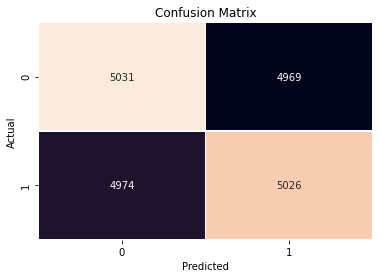

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     10000
           1       0.50      0.50      0.50     10000

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [55]:
print("Log Loss on test data on Random Model ", log_loss(y_test, np.array(log_loss_array))) #Pass prob values to log loss
y_pred= np.argmax(np.array(log_loss_array), axis=1)
print("The accuracy score on test data for random model is:",accuracy_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt ="d" , linewidth= 0.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

### Data Preprocessing

In [56]:
# Standardization of data

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
train_data_scaled_glove= pd.DataFrame(scale.fit_transform(x_train), columns=data_glove.iloc[:,1:].columns)

train_data_scaled_glove.head() # this is the x_train 

,Summary_count,Text_count,Summary_length,Text_length,Comment_count,Comment_length,0,1,2,3,...,374,375,376,377,378,379,380,381,382,383
0,-0.810523,-0.523236,-0.745542,-0.512896,-0.545531,-0.531854,1.378546,-0.498878,-2.187389,0.352395,...,-0.357029,-0.617567,-0.441529,-0.176339,-1.910427,0.370080,-1.274603,1.723819,0.843833,1.280364
1,-0.810523,-0.740190,-0.745542,-0.686697,-0.760420,-0.703969,1.742156,2.317841,0.939712,-0.774231,...,-0.604261,-0.034352,0.605245,-0.688873,0.551661,0.221845,-2.434630,0.978460,0.549494,0.657962
2,0.691976,0.114864,0.716979,0.159734,0.137057,0.181197,0.211950,-1.210947,-1.206944,0.110651,...,0.187771,-0.522707,-0.493327,1.175445,-0.086690,0.237857,-0.026431,-0.349859,0.625141,0.479543
3,0.316351,0.676393,0.299116,0.807535,0.680600,0.809308,-0.578017,0.124212,-0.869835,0.565744,...,-0.137642,-0.317079,0.082410,0.316572,0.823593,-0.894450,-0.278896,-0.524222,-0.797428,1.106269
4,0.316351,0.344581,0.368760,0.274848,0.351946,0.284020,0.756714,-0.410222,-0.144728,-0.201931,...,0.237006,-0.405259,1.124543,0.007701,-0.582704,-0.148829,1.422636,0.198684,-0.301290,0.544933


In [57]:
test_data_scaled_glove = pd.DataFrame(scale.transform(x_test), columns=data_glove.iloc[:,1:].columns)
test_data_scaled_glove.head()

,Summary_count,Text_count,Summary_length,Text_length,Comment_count,Comment_length,0,1,2,3,...,374,375,376,377,378,379,380,381,382,383
0,-0.810523,-0.650856,-0.536610,-0.609954,-0.671936,-0.621264,-0.213303,2.672526,0.096162,-1.122992,...,2.885377,0.721695,1.289491,-0.385049,2.032323,0.545406,-0.367957,-2.212567,-2.475793,1.733084
1,0.316351,-0.625332,0.368760,-0.591897,-0.608734,-0.574324,0.359038,-0.400116,-1.033736,0.679967,...,1.624143,-0.845594,-1.351202,-2.632898,0.081764,-0.279912,0.485945,-0.034937,0.131708,-0.252264
2,-0.810523,3.381938,-0.954473,3.123369,3.322471,3.062460,-0.428674,-0.727872,-0.325167,-0.236771,...,0.327068,-0.868955,-0.736607,0.318611,-0.089050,0.920472,0.523736,0.239815,-0.294834,0.725585
3,0.316351,0.714679,0.856267,0.638249,0.718522,0.659545,-0.183450,-0.060782,1.419178,-0.778235,...,-0.165620,-1.131539,-1.401658,0.355616,-0.347540,-0.775659,-0.154844,0.334971,-1.337682,-0.687491
4,-0.434898,-0.459426,-0.188391,-0.497096,-0.469688,-0.498325,1.332819,0.359344,-0.624941,-0.643572,...,1.996587,-0.177799,-1.330452,2.090884,-0.453534,-1.837081,-1.080452,0.534117,-1.628677,0.785451


# Modelling
### 1. Naive Bayes on Glove data

In [58]:
from sklearn.naive_bayes import MultinomialNB
n_bayes_glove = GaussianNB()
n_bayes_glove.fit(train_data_scaled_glove, y_train)

GaussianNB()

The accuracy score on train data is 0.648775
The accuracy score on test data is 0.64665


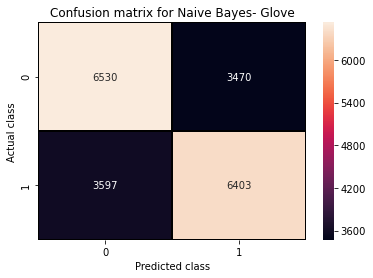

              precision    recall  f1-score   support

           0       0.64      0.65      0.65     10000
           1       0.65      0.64      0.64     10000

    accuracy                           0.65     20000
   macro avg       0.65      0.65      0.65     20000
weighted avg       0.65      0.65      0.65     20000



In [59]:
#Metrics for navie bayes model
from sklearn.metrics import log_loss, accuracy_score, auc, roc_auc_score, f1_score, confusion_matrix, classification_report
print("The accuracy score on train data is",accuracy_score(y_train, n_bayes_glove.predict(train_data_scaled_glove)))
print("The accuracy score on test data is",accuracy_score(y_test, n_bayes_glove.predict(test_data_scaled_glove)))

sns.heatmap(confusion_matrix(y_test, n_bayes_glove.predict(test_data_scaled_glove)), annot=True, fmt="d", linewidths=1, linecolor="black")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix for Naive Bayes- Glove")
plt.show()
print("="*75)
print(classification_report(y_test, n_bayes_glove.predict(test_data_scaled_glove)))

In [60]:
from sklearn.calibration import CalibratedClassifierCV
n_bayes_calib = CalibratedClassifierCV(base_estimator=n_bayes_glove)
n_bayes_calib.fit(train_data_scaled_glove, y_train)

predict_y = n_bayes_calib.predict_proba(test_data_scaled_glove)
print("the log loss for the model is:",log_loss(y_test, predict_y))

the log loss for the model is: 0.6423569009748282


### 2. Log Reg on Glove data

In [61]:
from sklearn.linear_model import SGDClassifier

alpha = [10**x for x in range(-5,3)]
log_loss_error= []
for i in tqdm(alpha):
    logreg_glove = SGDClassifier(loss="log", n_jobs=-1, random_state=1, alpha=i)
    logreg_glove.fit(train_data_scaled_glove, y_train)
    sig_cal_clf = CalibratedClassifierCV(logreg_glove)
    sig_cal_clf.fit(train_data_scaled_glove, y_train)
    predict_y = sig_cal_clf.predict_proba(test_data_scaled_glove)
    log_loss_error.append(log_loss(y_test, predict_y))
    print("the log loss for alpha",i,"is:",log_loss(y_test, predict_y))
    
print(log_loss_error)

 12%|█████▍                                     | 1/8 [03:04<21:33, 184.71s/it]

the log loss for alpha 1e-05 is: 0.4858321266466419


 25%|██████████▊                                | 2/8 [04:02<14:39, 146.61s/it]

the log loss for alpha 0.0001 is: 0.46740251122909177


 38%|████████████████▏                          | 3/8 [04:22<09:03, 108.76s/it]

the log loss for alpha 0.001 is: 0.4643954276286162


 50%|██████████████████████                      | 4/8 [04:33<05:17, 79.29s/it]

the log loss for alpha 0.01 is: 0.46963051131619477


 62%|███████████████████████████▌                | 5/8 [04:41<02:53, 57.94s/it]

the log loss for alpha 0.1 is: 0.49814842527974634


 75%|█████████████████████████████████           | 6/8 [04:49<01:25, 42.95s/it]

the log loss for alpha 1 is: 0.5565490936921078


 88%|██████████████████████████████████████▌     | 7/8 [04:56<00:32, 32.09s/it]

the log loss for alpha 10 is: 0.6107745046612352


100%|████████████████████████████████████████████| 8/8 [05:02<00:00, 37.87s/it]

the log loss for alpha 100 is: 0.6275341386708122
[0.4858321266466419, 0.46740251122909177, 0.4643954276286162, 0.46963051131619477, 0.49814842527974634, 0.5565490936921078, 0.6107745046612352, 0.6275341386708122]


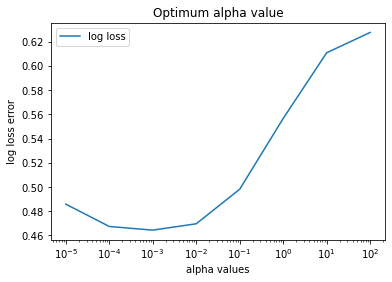

In [62]:
plt.plot(alpha, log_loss_error, label='log loss')
plt.xscale("log")
plt.xlabel("alpha values")
plt.ylabel('log loss error')
plt.title("Optimum alpha value")
plt.legend()
plt.show()

In [63]:
from sklearn.linear_model import SGDClassifier
lin_reg_glove = SGDClassifier(loss='log', alpha = 0.001, n_jobs=-1, random_state=2)
lin_reg_glove.fit(train_data_scaled_glove, y_train)

SGDClassifier(alpha=0.001, loss='log', n_jobs=-1, random_state=2)

The accuracy score on train data is 0.784625
The accuracy score on test data is 0.7806


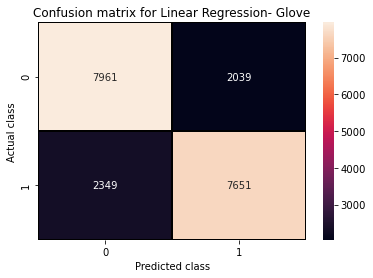

              precision    recall  f1-score   support

           0       0.77      0.80      0.78     10000
           1       0.79      0.77      0.78     10000

    accuracy                           0.78     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.78      0.78      0.78     20000



In [64]:
#Metrics for navie bayes model
from sklearn.metrics import log_loss, accuracy_score, auc, roc_auc_score, f1_score, confusion_matrix, classification_report
print("The accuracy score on train data is",accuracy_score(y_train, lin_reg_glove.predict(train_data_scaled_glove)))
print("The accuracy score on test data is",accuracy_score(y_test, lin_reg_glove.predict(test_data_scaled_glove)))

sns.heatmap(confusion_matrix(y_test, lin_reg_glove.predict(test_data_scaled_glove)), annot=True, fmt="d", linewidths=1, linecolor="black")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix for Linear Regression- Glove")
plt.show()
print("="*75)
print(classification_report(y_test, lin_reg_glove.predict(test_data_scaled_glove)))

In [65]:
from sklearn.calibration import CalibratedClassifierCV
lin_reg_calib = CalibratedClassifierCV(base_estimator=lin_reg_glove)
lin_reg_calib.fit(train_data_scaled_glove, y_train)

predict_y = lin_reg_calib.predict_proba(test_data_scaled_glove)
print("the log loss for the model is:",log_loss(y_test, predict_y))

the log loss for the model is: 0.4649213131667433


### 3. Linear SVM on Glove Data

In [66]:
from sklearn.linear_model import SGDClassifier
svm_glove = SGDClassifier(loss='hinge', alpha = 0.001, n_jobs=-1, random_state=2)
svm_glove.fit(train_data_scaled_glove, y_train)

SGDClassifier(alpha=0.001, n_jobs=-1, random_state=2)

The accuracy score on train data is 0.778725
The accuracy score on test data is 0.77725


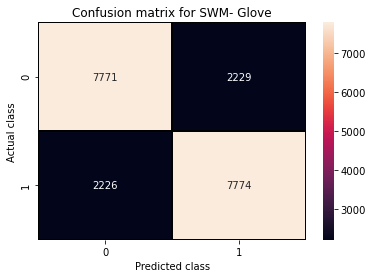

              precision    recall  f1-score   support

           0       0.78      0.78      0.78     10000
           1       0.78      0.78      0.78     10000

    accuracy                           0.78     20000
   macro avg       0.78      0.78      0.78     20000
weighted avg       0.78      0.78      0.78     20000



In [67]:
#Metrics for Log Reg model
from sklearn.metrics import log_loss, accuracy_score, auc, roc_auc_score, f1_score, confusion_matrix, classification_report
print("The accuracy score on train data is",accuracy_score(y_train, svm_glove.predict(train_data_scaled_glove)))
print("The accuracy score on test data is",accuracy_score(y_test, svm_glove.predict(test_data_scaled_glove)))

sns.heatmap(confusion_matrix(y_test, svm_glove.predict(test_data_scaled_glove)), annot=True, fmt="d", linewidths=1, linecolor="black")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix for SWM- Glove")
plt.show()
print("="*75)
print(classification_report(y_test, svm_glove.predict(test_data_scaled_glove)))

In [68]:
from sklearn.calibration import CalibratedClassifierCV
svm_calib = CalibratedClassifierCV(base_estimator=svm_glove)
svm_calib.fit(train_data_scaled_glove, y_train)

predict_y = svm_calib.predict_proba(test_data_scaled_glove)
print("the log loss for the model is:",log_loss(y_test, predict_y))

the log loss for the model is: 0.46437437608659304


### 4. Decision Tree on Glove dataset

The accuracy score on train data is 0.9237875
The accuracy score on test data is 0.59505


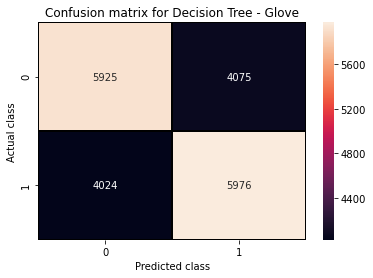

              precision    recall  f1-score   support

           0       0.60      0.59      0.59     10000
           1       0.59      0.60      0.60     10000

    accuracy                           0.60     20000
   macro avg       0.60      0.60      0.60     20000
weighted avg       0.60      0.60      0.60     20000



In [69]:
from sklearn.tree import DecisionTreeClassifier
dtree_glove = DecisionTreeClassifier(max_depth=15)
dtree_glove.fit(train_data_scaled_glove, y_train)

#Metrics for  model
from sklearn.metrics import log_loss, accuracy_score, auc, roc_auc_score, f1_score, confusion_matrix, classification_report
print("The accuracy score on train data is",accuracy_score(y_train, dtree_glove.predict(train_data_scaled_glove)))
print("The accuracy score on test data is",accuracy_score(y_test, dtree_glove.predict(test_data_scaled_glove)))

sns.heatmap(confusion_matrix(y_test, dtree_glove.predict(test_data_scaled_glove)), annot=True, fmt="d", linewidths=1, linecolor="black")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix for Decision Tree - Glove")
plt.show()
print("="*75)
print(classification_report(y_test, dtree_glove.predict(test_data_scaled_glove)))

In [70]:
from sklearn.calibration import CalibratedClassifierCV
dtree_calib = CalibratedClassifierCV(base_estimator=dtree_glove)
dtree_calib.fit(train_data_scaled_glove, y_train)

predict_y = dtree_calib.predict_proba(test_data_scaled_glove)
print("the log loss for the model is:",log_loss(y_test, predict_y))

the log loss for the model is: 0.6619101276852116


### 5.  Random Forest on Glove data

The accuracy score on train data is 1.0
The accuracy score on test data is 0.70465


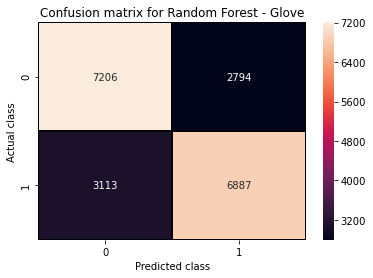

              precision    recall  f1-score   support

           0       0.70      0.72      0.71     10000
           1       0.71      0.69      0.70     10000

    accuracy                           0.70     20000
   macro avg       0.70      0.70      0.70     20000
weighted avg       0.70      0.70      0.70     20000



In [71]:
from sklearn.ensemble import RandomForestClassifier
rf_glove = RandomForestClassifier(n_estimators=100, oob_score=True)
rf_glove.fit(train_data_scaled_glove, y_train)

#Metrics for  model
from sklearn.metrics import log_loss, accuracy_score, auc, roc_auc_score, f1_score, confusion_matrix, classification_report
print("The accuracy score on train data is",accuracy_score(y_train, rf_glove.predict(train_data_scaled_glove)))
print("The accuracy score on test data is",accuracy_score(y_test, rf_glove.predict(test_data_scaled_glove)))

sns.heatmap(confusion_matrix(y_test, rf_glove.predict(test_data_scaled_glove)), annot=True, fmt="d", linewidths=1, linecolor="black")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix for Random Forest - Glove")
plt.show()
print("="*75)
print(classification_report(y_test, rf_glove.predict(test_data_scaled_glove)))

In [72]:
from sklearn.calibration import CalibratedClassifierCV
rf_calib = CalibratedClassifierCV(base_estimator=rf_glove)
rf_calib.fit(train_data_scaled_glove, y_train)

predict_y = rf_calib.predict_proba(test_data_scaled_glove)
print("the log loss for the model is:",log_loss(y_test, predict_y))

the log loss for the model is: 0.5544389626170448


In [75]:
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
xgb = XGBClassifier()
xgb.fit(train_data_scaled_glove, y_train)

XGBClassifier()

The accuracy score on train data is 0.7365
The accuracy score on test data is 0.71345


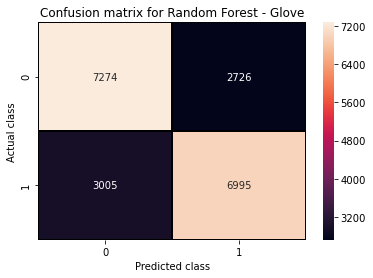

              precision    recall  f1-score   support

           0       0.71      0.73      0.72     10000
           1       0.72      0.70      0.71     10000

    accuracy                           0.71     20000
   macro avg       0.71      0.71      0.71     20000
weighted avg       0.71      0.71      0.71     20000



In [77]:
#Metrics for  model
from sklearn.metrics import log_loss, accuracy_score, auc, roc_auc_score, f1_score, confusion_matrix, classification_report
print("The accuracy score on train data is",accuracy_score(y_train, xgb.predict(train_data_scaled_glove)))
print("The accuracy score on test data is",accuracy_score(y_test, xgb.predict(test_data_scaled_glove)))

sns.heatmap(confusion_matrix(y_test, xgb.predict(test_data_scaled_glove)), annot=True, fmt="d", linewidths=1, linecolor="black")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix for XGBOOST - Glove")
plt.show()
print("="*75)
print(classification_report(y_test, xgb.predict(test_data_scaled_glove)))

In [ ]:
#Metrics for  model
from sklearn.metrics import log_loss, accuracy_score, auc, roc_auc_score, f1_score, confusion_matrix, classification_report
print("The accuracy score on train data is",accuracy_score(y_train, adaboost.predict(train_data_scaled_glove)))
print("The accuracy score on test data is",accuracy_score(y_test, adaboost.predict(test_data_scaled_glove)))

sns.heatmap(confusion_matrix(y_test, adaboost.predict(test_data_scaled_glove)), annot=True, fmt="d", linewidths=1, linecolor="black")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.title("Confusion matrix for Adaboost - Glove")
plt.show()
print("="*75)
print(classification_report(y_test, adaboost.predict(test_data_scaled_glove)))